###  Model Selection

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    cross_val_score,
)

from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

In [2]:
data = pd.read_csv(r"D:\python\M_L_P\supervised\Classification\pulsar_data_train.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
scaler = StandardScaler()

In [7]:
x = df.drop("target_class", axis=1)
y = df["target_class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [9]:
df["target_class"].value_counts()

target_class
0.0    8423
1.0     850
Name: count, dtype: int64

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
svc = SVC(C=100, kernel="rbf")

In [14]:
svc.fit(X_train, y_train)

SVC(C=100)

In [15]:
y_pred = svc.predict(X_test)

In [16]:
print(
    "Model accuracy score with default hyperparameters: {0:0.4f}".format(
        accuracy_score(y_test, y_pred)
    )
)

Model accuracy score with default hyperparameters: 0.9779


### Confusion matrix 

- A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

- Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.


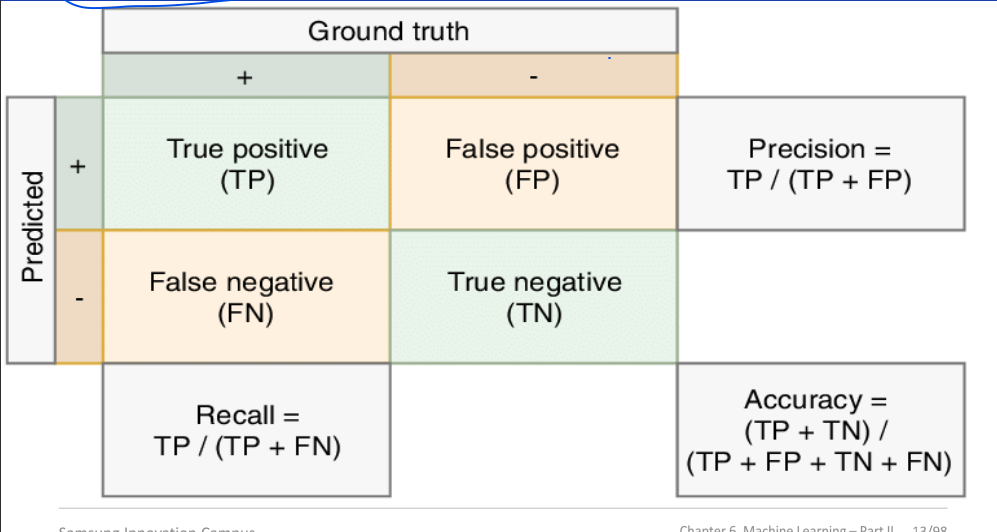

In [17]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix\n\n", cm)

Confusion matrix

 [[1682   10]
 [  31  132]]


In [18]:
print("Confusion matrix\n\n", cm)

print("\nTrue Positives(TP) = ", cm[0, 0])

print("\nTrue Negatives(TN) = ", cm[1, 1])

print("\nFalse Positives(FP) = ", cm[0, 1])

print("\nFalse Negatives(FN) = ", cm[1, 0])

Confusion matrix

 [[1682   10]
 [  31  132]]

True Positives(TP) =  1682

True Negatives(TN) =  132

False Positives(FP) =  10

False Negatives(FN) =  31


<Axes: >

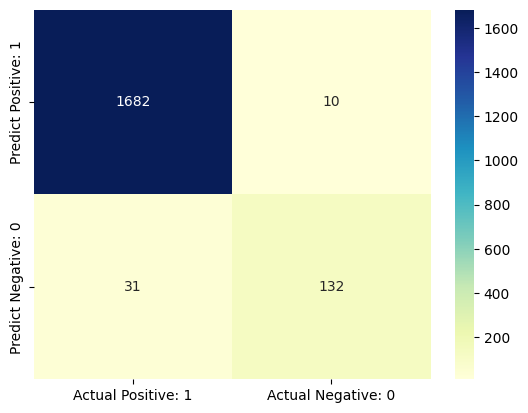

In [19]:
cm_matrix = pd.DataFrame(
    data=cm,
    columns=["Actual Positive: 1", "Actual Negative: 0"],
    index=["Predict Positive: 1", "Predict Negative: 0"],
)

sns.heatmap(cm_matrix, annot=True, fmt="", cmap="YlGnBu")

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1692
         1.0       0.93      0.81      0.87       163

    accuracy                           0.98      1855
   macro avg       0.96      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855



In [21]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [22]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print("Classification accuracy : {0:0.4f}".format(classification_accuracy))

Classification accuracy : 0.9779


In [23]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("Classification error : {0:0.4f}".format(classification_error))

Classification error : 0.0221


### Precision
- Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

- So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

- Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [24]:
precision = TP / float(TP + FP)

print("Precision : {0:0.4f}".format(precision))

Precision : 0.9941


### Recall
- Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

- Recall identifies the proportion of correctly predicted actual positives.

- Mathematically, recall can be defined as the ratio of TP to (TP + FN).

In [25]:
recall = TP / float(TP + FN)

print("Recall or Sensitivity : {0:0.4f}".format(recall))

Recall or Sensitivity : 0.9819


In [26]:
true_positive_rate = TP / float(TP + FN)

print("True Positive Rate : {0:0.4f}".format(true_positive_rate))

True Positive Rate : 0.9819


In [27]:
false_positive_rate = FP / float(FP + TN)

print("False Positive Rate : {0:0.4f}".format(false_positive_rate))

False Positive Rate : 0.0704


### f1-score
- f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [28]:
specificity = TN / (TN + FP)

print("Specificity : {0:0.4f}".format(specificity))

Specificity : 0.9296


### AUC -ROC Curve

- Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

- The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

- True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

- False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

- In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

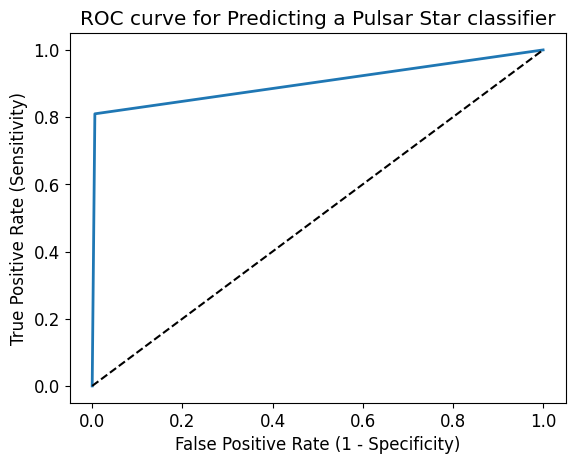

In [33]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.rcParams["font.size"] = 12
plt.title("ROC curve for Predicting a Pulsar Star classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")

plt.show()

### GridSearch CV 

In [35]:
svc = SVC()

In [36]:
parameters = [
    {"C": [1, 10, 100, 1000], "kernel": ["linear"]},
    {
        "C": [1, 10, 100, 1000],
        "kernel": ["rbf"],
        "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    },
    {
        "C": [1, 10, 100, 1000],
        "kernel": ["poly"],
        "degree": [2, 3, 4],
        "gamma": [0.01, 0.02, 0.03, 0.04, 0.05],
    },
]


grid_search = GridSearchCV(
    estimator=svc, param_grid=parameters, scoring="accuracy", cv=5, verbose=0
)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [37]:
print("GridSearch CV best score : {:.4f}\n\n".format(grid_search.best_score_))

print("Parameters that give the best results :", "\n\n", (grid_search.best_params_))

print(
    "\n\nEstimator that was chosen by the search :",
    "\n\n",
    (grid_search.best_estimator_),
)

GridSearch CV best score : 0.9800


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.7)


In [38]:
print(
    "GridSearch CV score on test set: {0:0.4f}".format(
        grid_search.score(X_test, y_test)
    )
)

GridSearch CV score on test set: 0.9790


### Stratified k-fold Cross Validation with shuffle split

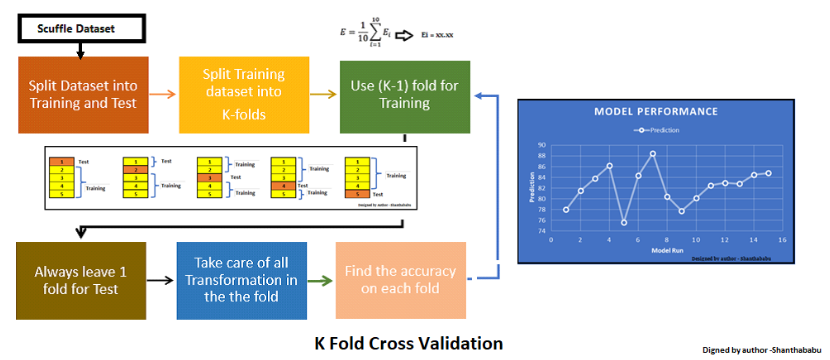

In [42]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc = SVC(kernel="linear")
linear_scores = cross_val_score(linear_svc, x, y, cv=kfold)

In [43]:
print(
    "Stratified cross-validation scores with linear kernel:\n\n{}".format(linear_scores)
)

Stratified cross-validation scores with linear kernel:

[0.97466307 0.97951482 0.98221024 0.9768069  0.97842503]


In [44]:
print(
    "Average stratified cross-validation score with linear kernel:{:.4f}".format(
        linear_scores.mean()
    )
)

Average stratified cross-validation score with linear kernel:0.9783


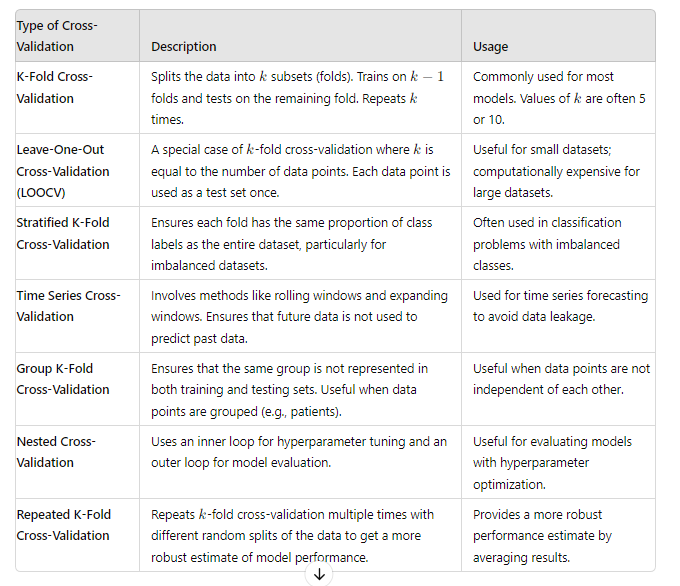